In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('/home/siddharth/Documents/ubuntu_python_work/pandas/task2/olympic_medals.csv')

In [4]:
sports=[]

for i in range(len(df)):
    if df['discipline_title'][i] not in sports:
        sports.append(df['discipline_title'][i])

sports

['Shooting',
 'Diving',
 'Canoe Sprint',
 'Cycling Road',
 'Football',
 'Boxing',
 'Artistic Swimming',
 'Handball',
 'Rugby Sevens',
 'Cycling BMX Racing',
 'Triathlon',
 'Surfing',
 'Table Tennis',
 'Canoe Slalom',
 'Marathon Swimming',
 'Trampoline Gymnastics',
 'Volleyball',
 'Basketball',
 'Taekwondo',
 'Cycling Track',
 'Fencing',
 'Badminton',
 'Water Polo',
 'Sport Climbing',
 'Wrestling',
 'Tennis',
 'Artistic Gymnastics',
 'Golf',
 'Cycling BMX Freestyle',
 'Judo',
 'Skateboarding',
 'Archery',
 'Weightlifting',
 'Baseball/Softball',
 'Equestrian',
 'Modern Pentathlon',
 'Athletics',
 'Swimming',
 'Sailing',
 'Cycling Mountain Bike',
 'Rowing',
 'Karate',
 '3x3 Basketball',
 'Rhythmic Gymnastics',
 'Hockey',
 'Beach Volleyball',
 'Skeleton',
 'Speed skating',
 'Biathlon',
 'Snowboard',
 'Freestyle Skiing',
 'Nordic Combined',
 'Curling',
 'Figure skating',
 'Ski Jumping',
 'Short Track',
 'Alpine Skiing',
 'Luge',
 'Ice Hockey',
 'Cross Country Skiing',
 'Bobsleigh',
 'Cyclin

In [5]:
countries=[]
for i in range(len(df)):
    if df['country_name'][i] not in countries:
        countries.append(df['country_name'][i])

countries

['Spain',
 'San Marino',
 'United States of America',
 'ROC',
 'Switzerland',
 'Serbia',
 "People's Republic of China",
 'France',
 'Cuba',
 'Czech Republic',
 'Great Britain',
 'Italy',
 'Slovakia',
 'Bulgaria',
 'Republic of Korea',
 'Islamic Republic of Iran',
 'Ukraine',
 'Kuwait',
 'Denmark',
 'Germany',
 'Canada',
 'Mexico',
 'Australia',
 'New Zealand',
 'Hungary',
 'Belarus',
 'Poland',
 'Republic of Moldova',
 'Brazil',
 'Portugal',
 'Netherlands',
 'Austria',
 'Slovenia',
 'Ecuador',
 'Belgium',
 'Sweden',
 'Ireland',
 'Philippines',
 'Uzbekistan',
 'Kazakhstan',
 'Azerbaijan',
 'Ghana',
 'Finland',
 'Thailand',
 'India',
 'Turkey',
 'Japan',
 'Chinese Taipei',
 'Armenia',
 'Norway',
 'Fiji',
 'Argentina',
 'Colombia',
 'Bermuda',
 'South Africa',
 'Hong Kong, China',
 'Jordan',
 'Egypt',
 'Croatia',
 'North Macedonia',
 "Côte d'Ivoire",
 'Tunisia',
 'Israel',
 'Malaysia',
 'Estonia',
 'Romania',
 'Indonesia',
 'Greece',
 'Mongolia',
 'Kyrgyzstan',
 'Nigeria',
 'Georgia',
 'V

In [6]:
medals=[0 for i in range(len(countries))]

for i in range(len(df)):
    medals[countries.index(df['country_name'][i])]+=1

for i in range(len(medals)):
    for j in range(len(medals)-1-i):
        if medals[j]<medals[j+1]:
            temp=medals[j]
            medals[j]=medals[j+1]
            medals[j+1]=temp

            temp=countries[j]
            countries[j]=countries[j+1]
            countries[j+1]=temp

countries=countries[:10]
medals=medals[:10]

In [7]:
mostwon={}

for i in range(len(countries)):
    l=[0 for j in range(86)]
    tempsports=sports
    for j in range(len(df)):
        if(df['country_name'][j]==countries[i]):
            l[sports.index(df['discipline_title'][j])]+=1
    for j in range(86):
        for k in range(86-1-j):
            if l[k]<l[k+1]:
                temp=l[k]
                l[k]=l[k+1]
                l[k+1]=temp

                temp=tempsports[k]
                tempsports[k]=tempsports[k+1]
                tempsports[k+1]=temp
    mostwon[countries[i]]=[tempsports[0]]

In [8]:
for key, value in mostwon.items():
    for i in range(len(df)):
        if df['country_name'][i]==key:
            value.insert(0, df['country_code'][i])
            # value.insert(1, df['country_3_letter_code'][i])
            break

In [9]:
for key, value in mostwon.items():
    l1=[]
    l2=[]
    for i in range(len(df)):
        if df['country_name'][i]==key and df['discipline_title'][i]==value[1]:
            if df['event_title'][i] not in l:
                l1.append(df['event_title'][i])
                l2.append(0)
            else:
                l2[l1.index(df['event_title'][i])]+=1
    for i in range(len(l1)):
        for j in range(len(l1)-1-i):
            if(l2[j]<l2[j+1]):
                temp=l1[j]
                l1[j]=l1[j+1]
                l1[j+1]=temp

                temp=l2[j]
                l2[j]=l2[j+1]
                l2[j+1]=temp
    mostwon[key].append(l1[0])

In [10]:
for key, value in mostwon.items():
    for i in range(len(df)):
        if(value[2]==df['event_title'][i]):
            value.append(df['event_gender'][i])
            value.append(df['participant_type'][i])
            break

In [11]:
tabledata=[]

for key, value in mostwon.items():
    tabledata.append(value)

In [12]:
tablecolumns=['country_code', 'country_3_letter_code', 'discipline_title', 'event_title', 'event_gender', 'participant_type']
tablerows=[key for key in mostwon.keys()]

['country_code', 'country_3_letter_code', 'discipline_title', 'event_title', 'event_gender', 'participant_type']
['United States of America', 'Soviet Union', 'Germany', 'Great Britain', 'France', "People's Republic of China", 'Italy', 'Sweden', 'Australia', 'Russian Federation']
[['US', 'Athletics', '4 x 400m Relay Mixed', 'Mixed', 'GameTeam'], [nan, 'Athletics', '1500m women', 'Women', 'Athlete'], ['DE', 'Athletics', "Women's Long Jump", 'Women', 'Athlete'], ['GB', 'Athletics', "Women's 1500m", 'Women', 'Athlete'], ['FR', 'Fencing', "Men's Foil Team", 'Men', 'GameTeam'], ['CN', 'Diving', "Men's Synchronised 3m Springboard", 'Men', 'GameTeam'], ['IT', 'Fencing', "Women's Épée Team", 'Women', 'GameTeam'], ['SE', 'Cross Country Skiing', 'Ladies’ 4x5km Relay', 'Women', 'GameTeam'], ['AU', 'Swimming', "Men's 400m Individual Medley", 'Men', 'Athlete'], ['RU', 'Athletics', '20km race walk women', 'Women', 'Athlete']]


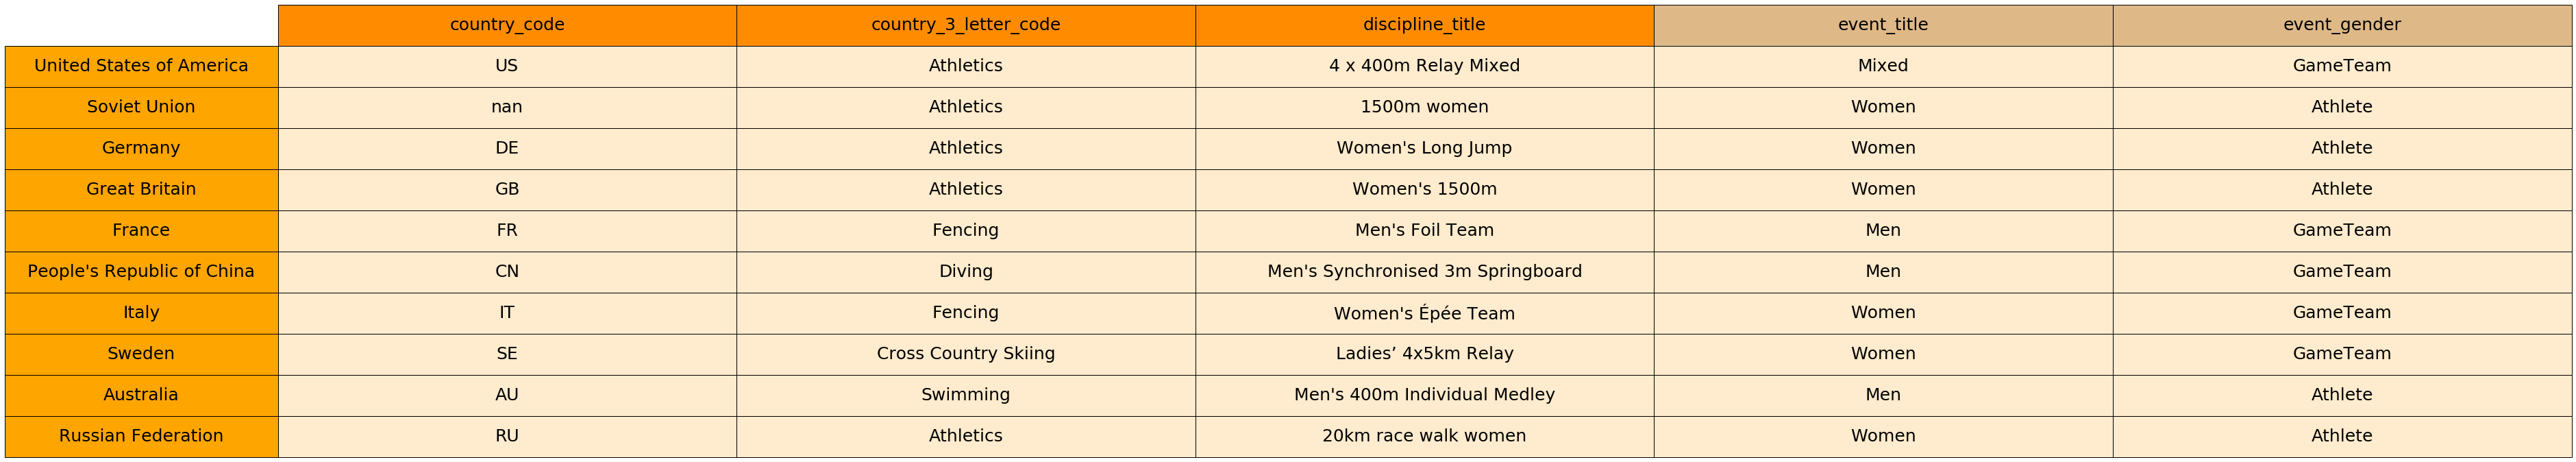

In [13]:
print(tablecolumns)
print(tablerows)
print(tabledata)

fig, ax = plt.subplots()
ax.set_axis_off()
cell_colors=[["blanchedalmond" for i in range(5)] for j in range(10)]
mytable=plt.table(cellText=tabledata,rowLabels=tablerows,colLabels=tablecolumns,rowColours=["orange"]*10,colColours=["darkorange", "darkorange", "darkorange", "burlywood", "burlywood"],cellLoc="center", rowLoc="center",loc="center",cellColours=cell_colors)
mytable.scale(10, 5)
mytable.set_fontsize(25)
plt.savefig('pyplot-table-original.png',
            bbox_inches='tight',
            dpi=500
            )
plt.show()